# EDA (Exploratory Data Analysis)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Dataset: Penetracion de internet (Acceso por 100 hogares)

In [34]:
df = pd.read_excel('Datasets/1_Internet_Penetracion.xlsx', sheet_name='Penetracion-hogares')
df

,Año,Trimestre,Provincia,Accesos por cada 100 hogares
0,2022,4,Buenos Aires,78.940000
1,2022,4,Capital Federal,122.730000
2,2022,4,Catamarca,65.770000
3,2022,4,Chaco,43.620000
4,2022,4,Chubut,85.570000
...,...,...,...,...
859,2014,1,Santa Cruz,28.939093
860,2014,1,Santa Fe,47.847663
861,2014,1,Santiago Del Estero,16.309924
862,2014,1,Tierra Del Fuego,63.965926


Al observar el dataframe podemos ver que contiene el acceso a internet en diferentes provincias cada 100 hogares de Argentina durante el año 2014 hasta el 2022 y separados por trimestres del año. 
Cada columna contiene:
- **Año:** Representa el año al que corresponden los datos.
- **Trimestre:** Indica el trimestre al que pertenecen los datos.
- **Provincia:** Enumera las provincias de Argentina.
- **Accesos por cada 100 hogares:** Muestra la cantidad de accesos a Internet por cada 100 hogares en cada provincia.

#### Analisis del dataset

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           864 non-null    int64  
 1   Trimestre                     864 non-null    int64  
 2   Provincia                     864 non-null    object 
 3   Accesos por cada 100 hogares  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


Ponemos provincia como category ya que es una variable cualitativa categorica.

In [4]:
df['Provincia'] = df['Provincia'].astype('category')

##### Valores faltantes y repetidos

In [5]:
print(df.isna().sum())
print('-'*50)
print(df.value_counts()[df.value_counts() > 2])

Año                             0
Trimestre                       0
Provincia                       0
Accesos por cada 100 hogares    0
dtype: int64
--------------------------------------------------
Series([], Name: count, dtype: int64)


Podemos observar que no hay valores nulos, ni valores duplicados.

### Graficos

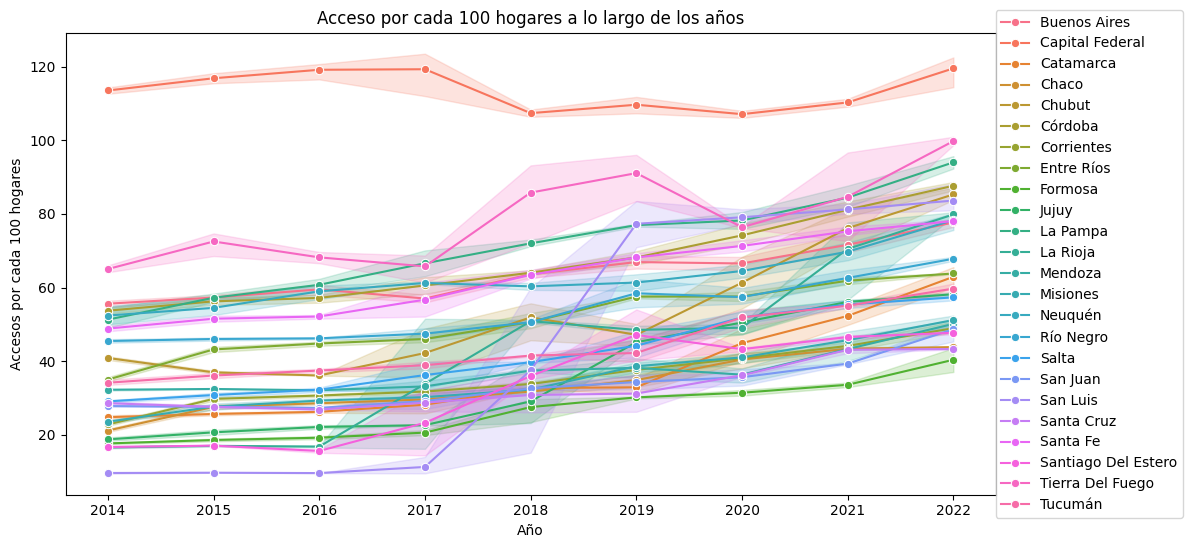

In [35]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Año',y='Accesos por cada 100 hogares', data = df, hue='Provincia', marker='o')
plt.legend(loc=(1,-0.05))
plt.title('Acceso por cada 100 hogares a lo largo de los años')
plt.show()

Este gráfico de líneas proporciona una representación visual de cómo ha evolucionado el acceso a Internet cada 100 hogares a lo largo de los años en diferentes provincias. Los ejes de coordenadas se utilizan de la siguiente manera:

- **Eje X:** Representa el tiempo, con los años dispuestos en orden cronológico.
- **Eje Y:** Muestra el acceso a Internet expresado como la cantidad de conexiones por cada 100 hogares en las provincias.

Al observar este gráfico, podemos realizar un análisis detallado de cómo la conectividad a Internet ha avanzado o retrocedido en el transcurso de los años en estas regiones. Cada punto en la línea de una provincia específica representa la situación de la conectividad en un año determinado. Las tendencias clave incluyen:

- Si la línea asciende, indica un aumento en la cantidad de conexiones por cada 100 hogares en esa provincia, lo que generalmente se considera un avance positivo en términos de acceso a la red.
- Si la línea desciende, podría indicar una disminución en la conectividad, lo que podría ser motivo de preocupación.

Este tipo de gráfico no solo permite evaluar la tendencia general de la conectividad en las provincias a lo largo del tiempo, sino que también proporciona una visión más detallada de las variaciones que pueden haber ocurrido en cada región. Además, es una herramienta valiosa para identificar diferencias significativas en el acceso a Internet entre las provincias y comprender cómo estas disparidades han evolucionado a lo largo de los años.

Es importante tener en cuenta que las tendencias en la conectividad a Internet pueden estar influenciadas por una serie de factores, como inversiones en infraestructura, políticas gubernamentales, demanda de servicios, avances tecnológicos y eventos económicos y sociales. Al considerar todos estos elementos, este gráfico de líneas se convierte en una herramienta esencial para la toma de decisiones y la planificación de políticas destinadas a mejorar el acceso a Internet en las provincias.

#### Promedio de acceso cada 100 hogares en todos los años por provincia.

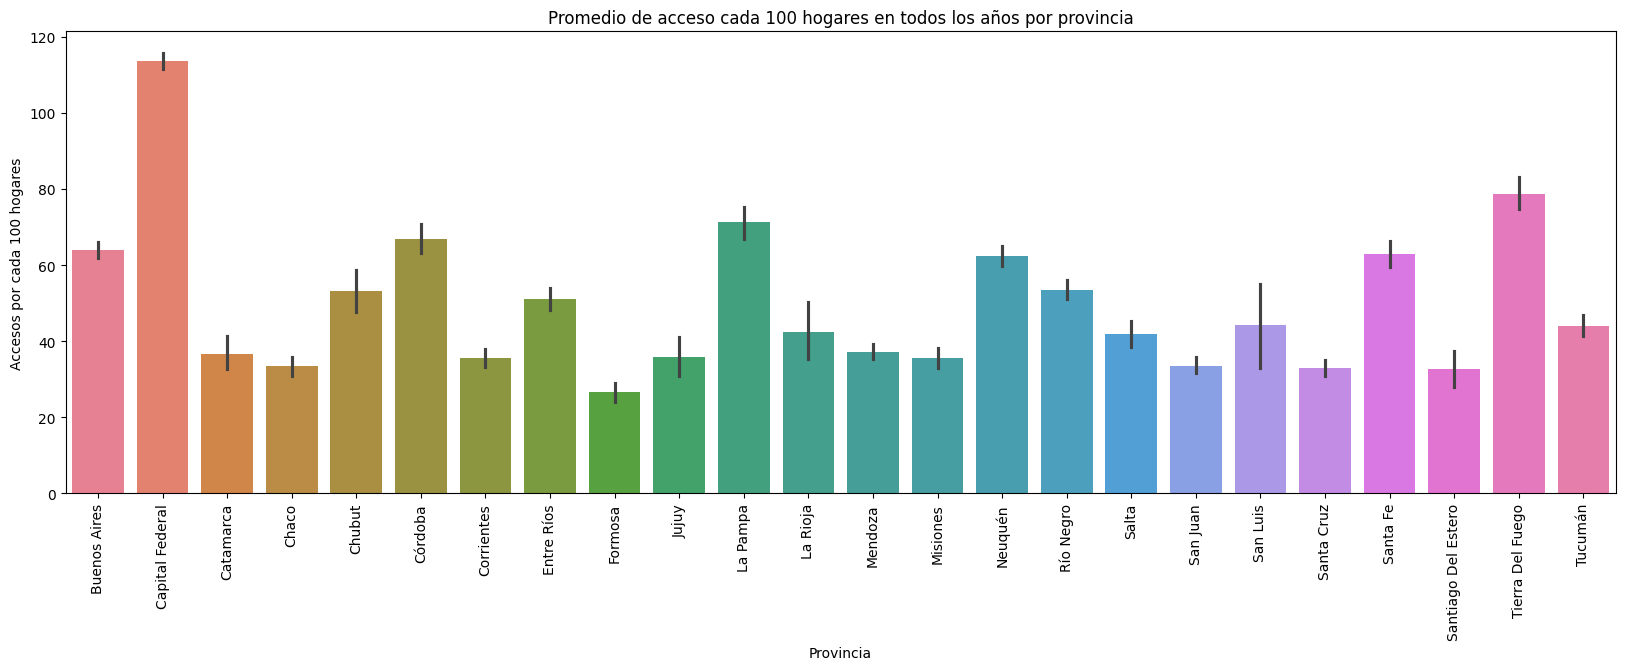

In [36]:
plt.figure(figsize=(20,6))
sns.barplot(x='Provincia', y='Accesos por cada 100 hogares', data=df, hue='Provincia')
plt.title('Promedio de acceso cada 100 hogares en todos los años por provincia')
plt.xticks(rotation = 90)
plt.show()

En el gráfico de barras que presentamos, se muestra la media de acceso a Internet por cada 100 hogares en todas las provincias de nuestro país. Cada barra representa el promedio de conectividad a lo largo de varios años, lo que nos brinda la posibilidad de observar las variaciones en la distribución del acceso a Internet en todas las provincias desde 2014 hasta 2022.

#### Analisis provincia por provincia

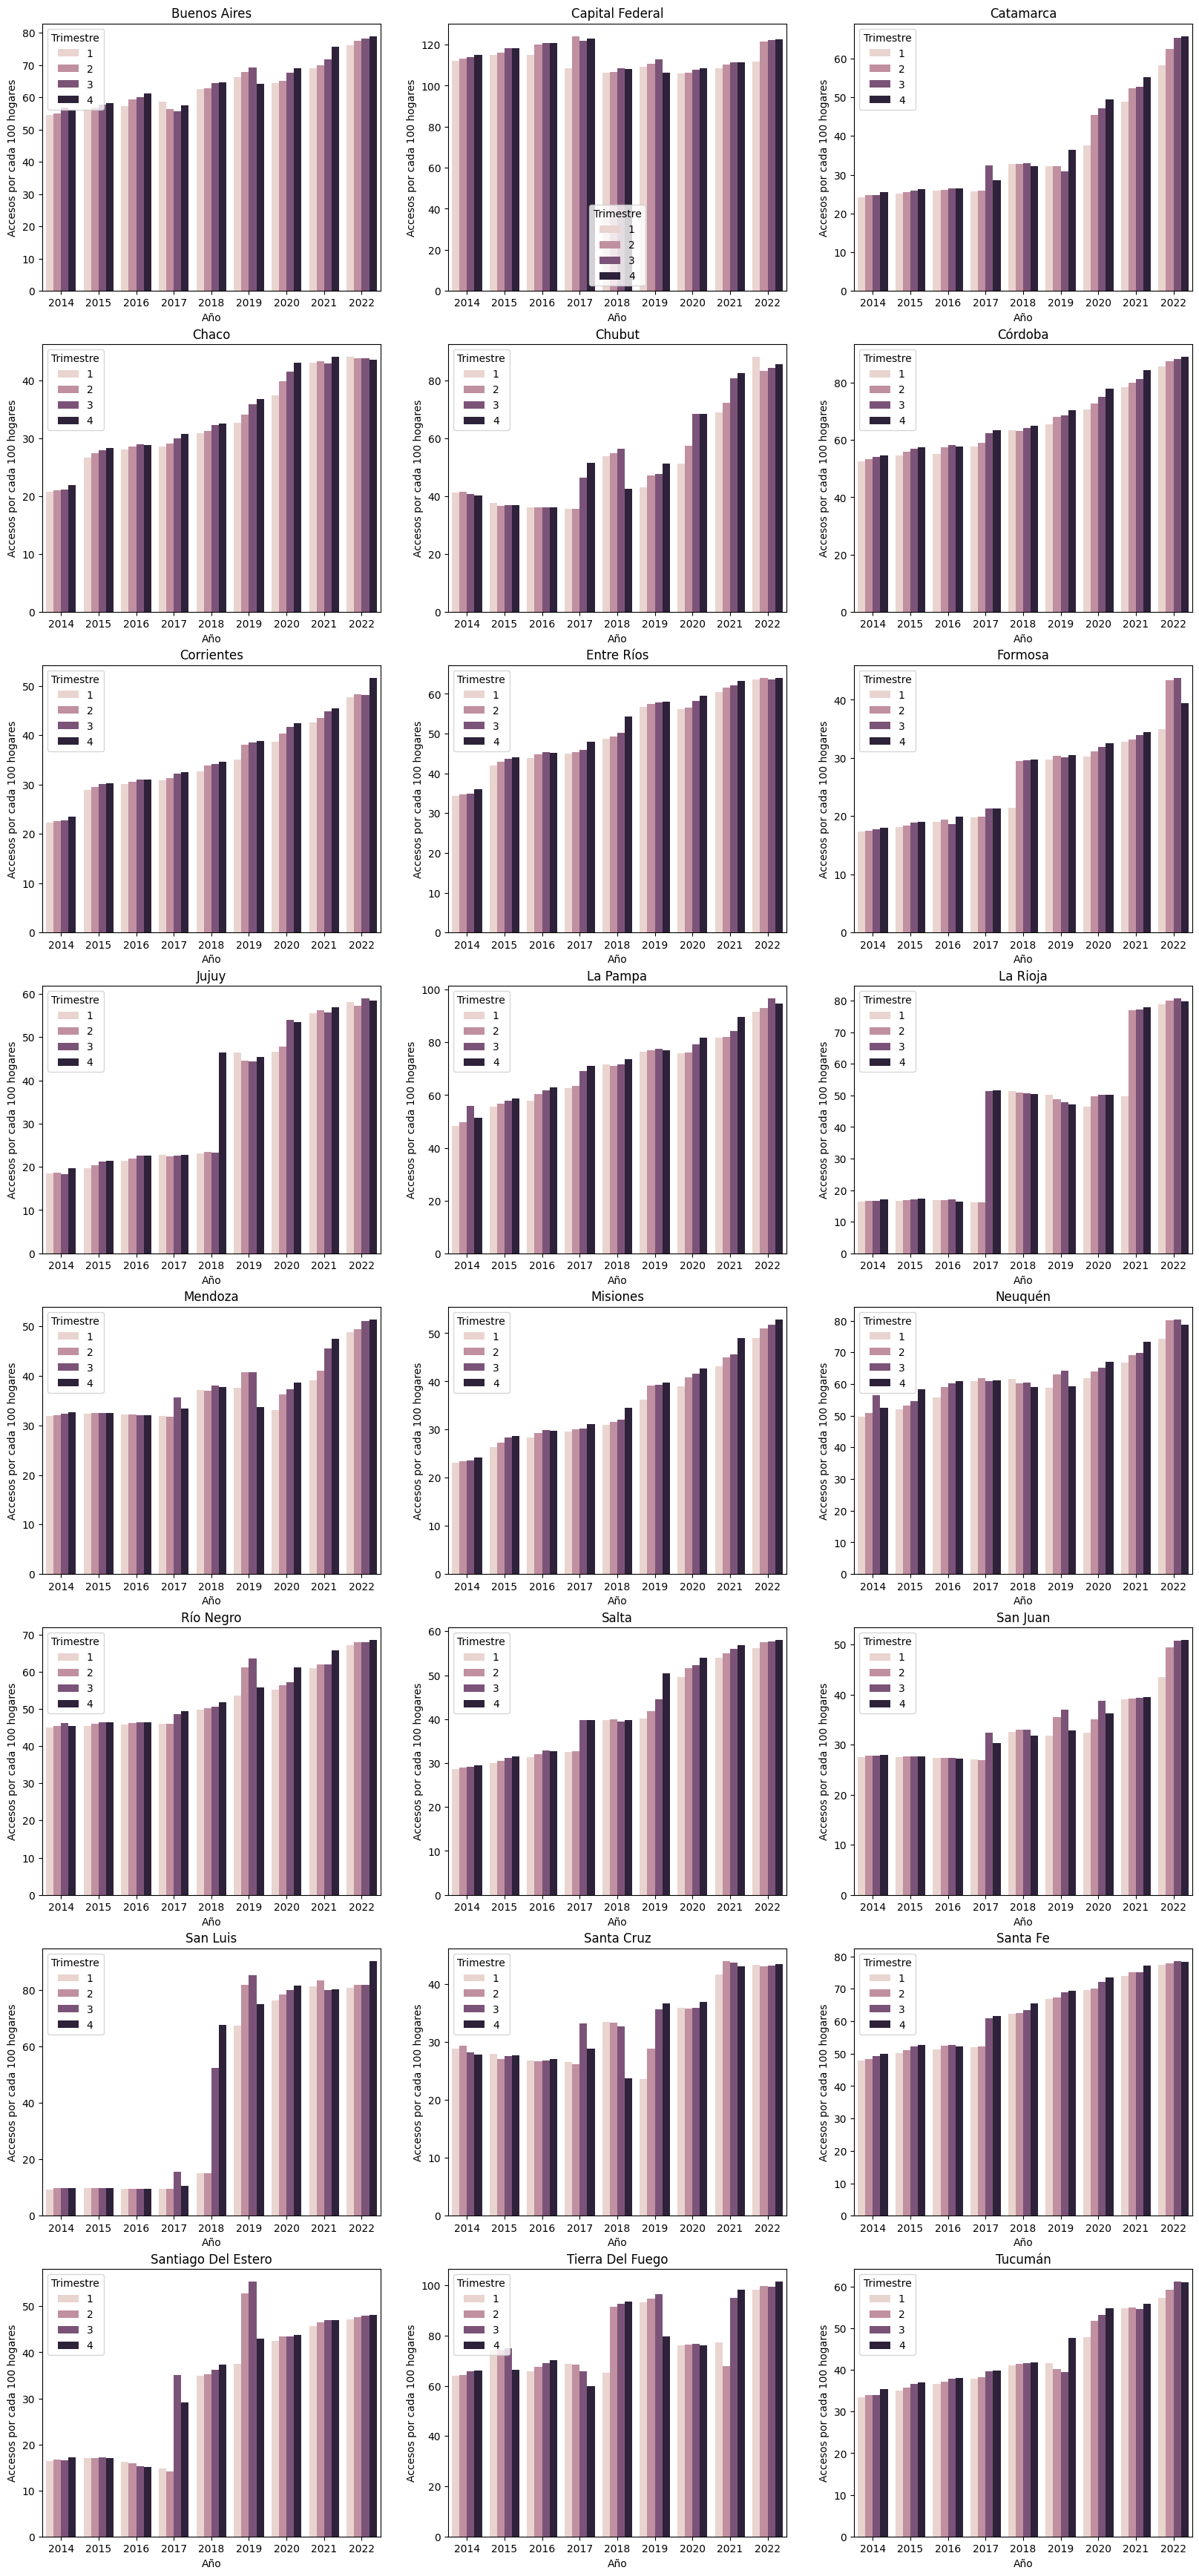

In [8]:
cantidad = 1
plt.figure(figsize=(20,44))
for provincia in df['Provincia'].unique().tolist():
    plt.subplot(8,3,cantidad)
    sns.barplot(data = df[(df['Provincia'] == provincia)], x = 'Año', y='Accesos por cada 100 hogares', hue='Trimestre')
    plt.title(f'{provincia}')
    cantidad+=1

plt.show()

Al analizar provincia por provincia, podemos identificar saltos significativos en el gráfico de barras, lo cual es de particular interés. Estos saltos representan áreas de oportunidad que merecen un estudio más detallado. Por ejemplo, en provincias como San Luis, La Rioja y Jujuy, observamos un incremento notorio en la métrica de acceso a Internet por cada 100 hogares.

### Deteccion de outliers

<Axes: xlabel='Año', ylabel='Accesos por cada 100 hogares'>

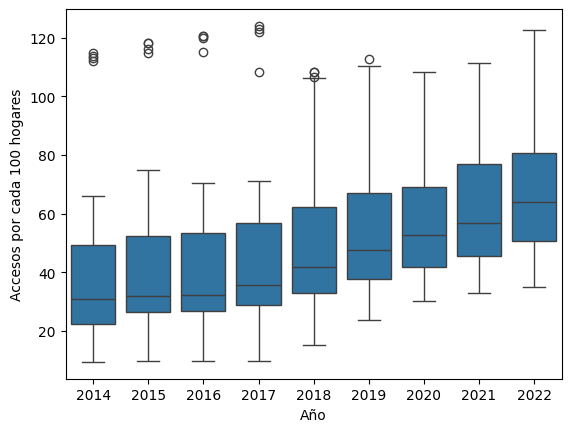

In [9]:
sns.boxplot(x='Año',y='Accesos por cada 100 hogares', data = df)

En este diagrama de cajas, se identifican valores anómalos (outliers) en el intervalo de 100 a 120. No obstante, al examinar detenidamente los datos por provincia, se constata que estos valores excepcionales están presentes en Capital Federal.

Continuaremos generando gráficos de cajas individuales para cada provincia con el objetivo de reforzar la observación anterior:

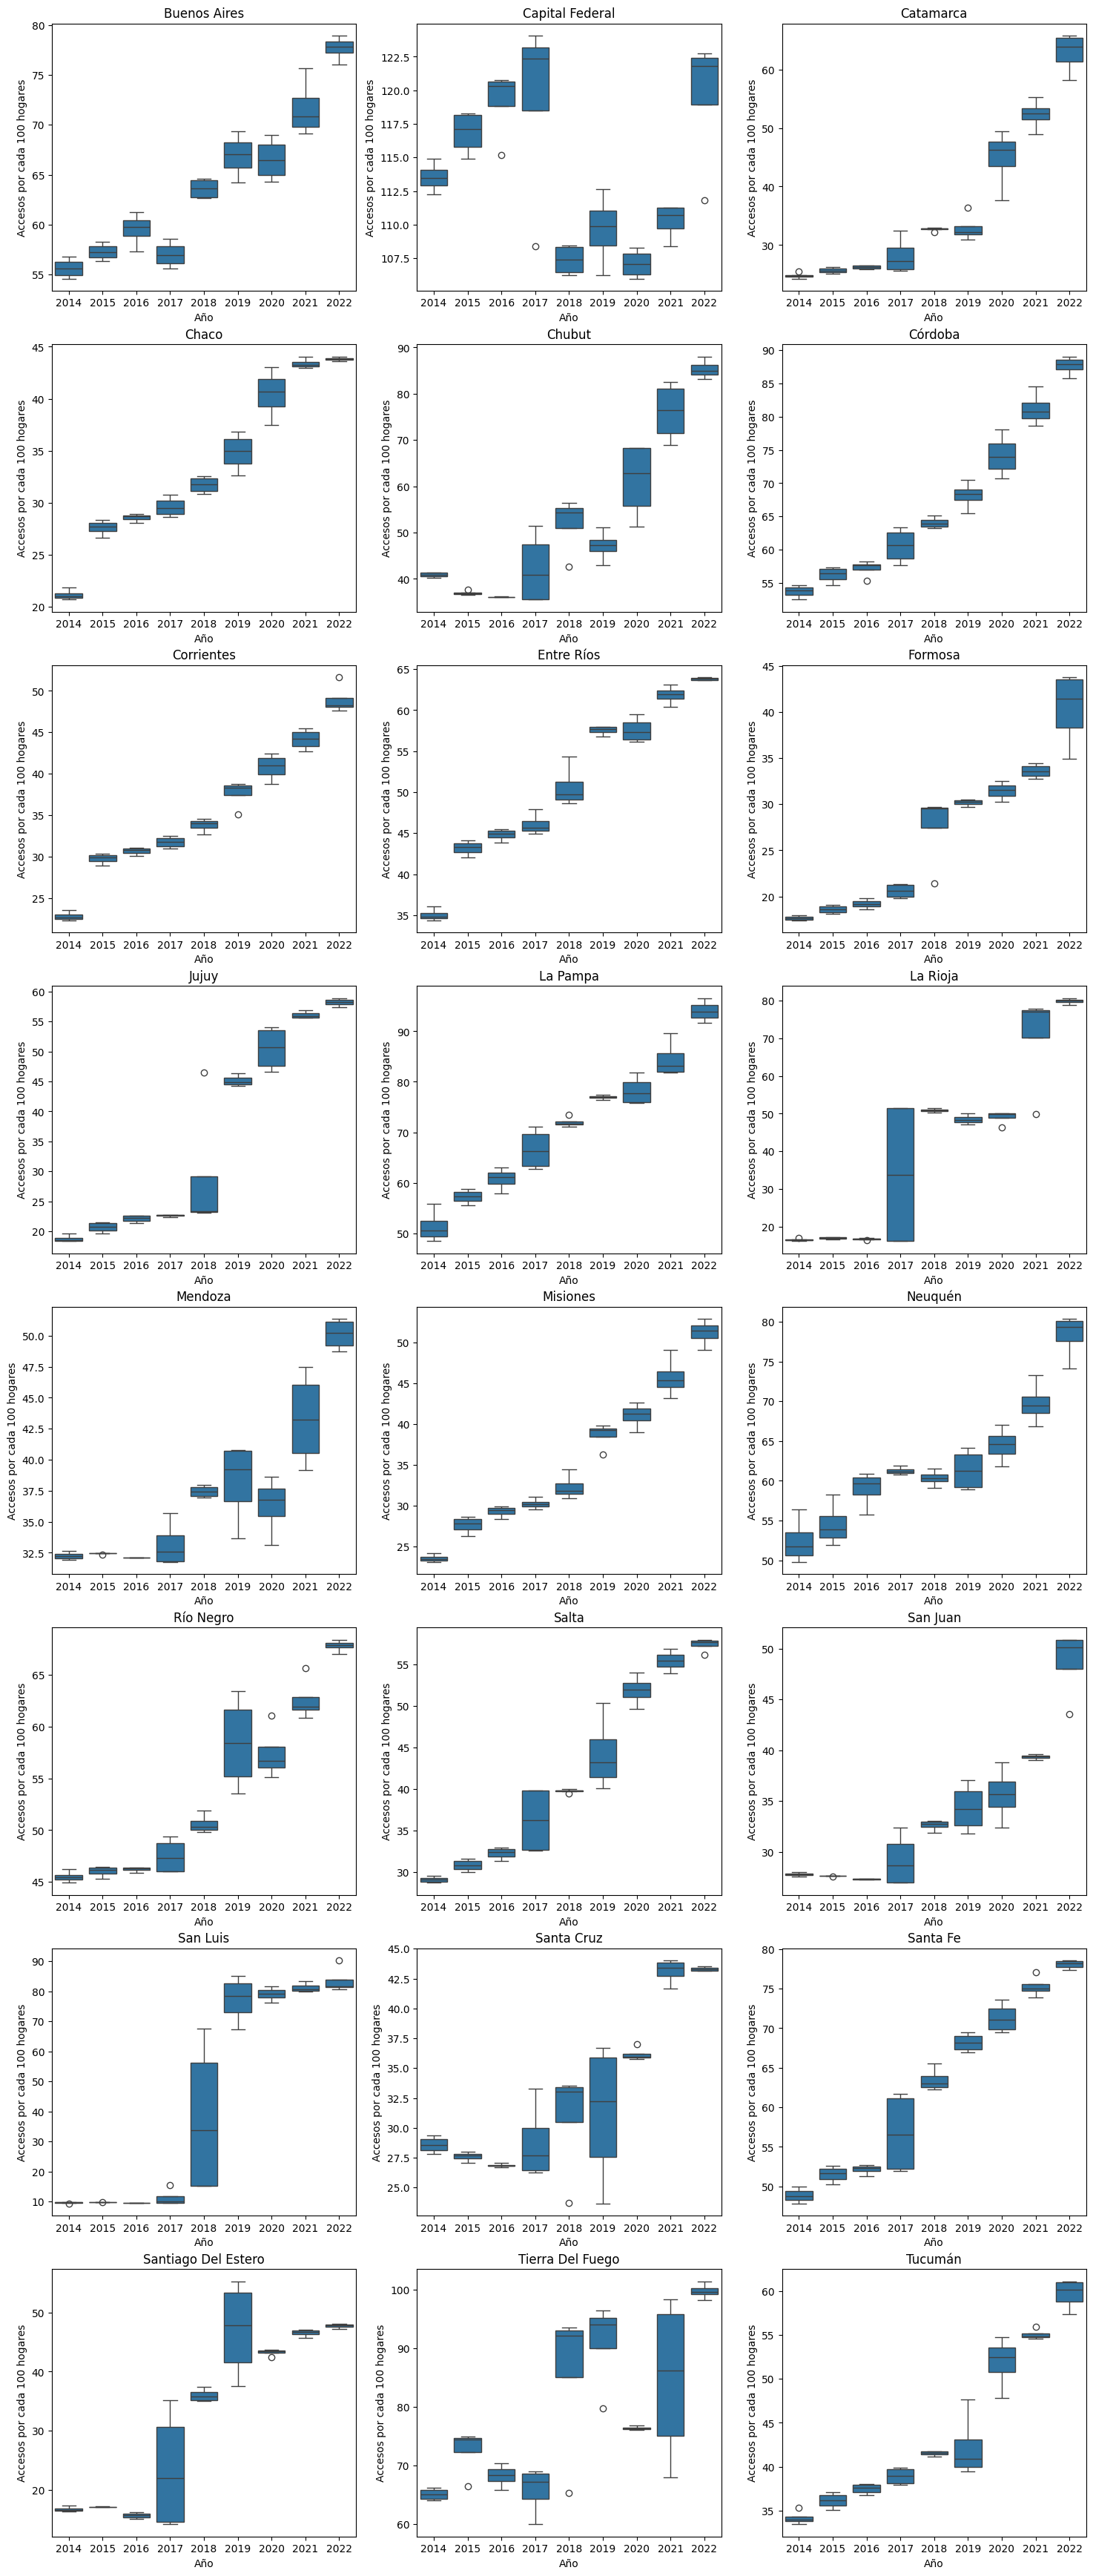

In [10]:
cantidad = 1
plt.figure(figsize=(18,44))
for provincia in df['Provincia'].unique().tolist():
    plt.subplot(8,3,cantidad)
    sns.boxplot(data = df[(df['Provincia'] == provincia)], x = 'Año', y='Accesos por cada 100 hogares')
    plt.title(f'{provincia}')
    cantidad+=1

plt.show()

Es posible identificar valores atípicos en el gráfico general que abarca todas las provincias. Sin embargo, cuando llevamos a cabo un análisis detallado provincia por provincia, estos valores atípicos desaparecen. Esta observación sugiere que, a nivel provincial, las discrepancias o variaciones excepcionales en la métrica tienden a nivelarse o encontrar explicaciones locales. Este análisis más granular nos permite comprender mejor la dinámica de la métrica en cada región y resaltar la importancia de considerar el contexto provincial al evaluar estos datos.

### ETL para Power Bi

In [11]:
# Creamos una nueva columna para equiparar el valor del kpi
df['Mes proximo'] = None

provincias = df['Provincia'].unique().tolist()
# Los que tienen un valor en el proximo trimestre los guardamos como proximo
for provincia in provincias:
    lista = df.loc[df['Provincia'] == provincia, 'Accesos por cada 100 hogares'].to_list()
    lista = lista[:-1]
    df.loc[(df['Provincia'] == provincia) & ((df['Año'] != 2022) | (df['Trimestre'] != 4)), 'Mes proximo'] = lista 

# Los que no tienen valor en el proximo mes osea los del 2022 Trim 4. ponemos el mismo valor que tiene.
for provincia in provincias:
    lista = df.loc[(df['Provincia'] == provincia) & ((df['Año'] == 2022) & (df['Trimestre'] == 4)), 'Accesos por cada 100 hogares'].to_list()
    df.loc[(df['Provincia'] == provincia) & ((df['Año'] == 2022) & (df['Trimestre'] == 4)), 'Mes proximo'] = lista 

### Exportamos a csv para su uso en Power Bi

In [12]:
df.to_csv('Datasets trabajados/Acceso_hogares.csv', sep=';', index=False)

## Dataset: Internet BAF

In [46]:
df = pd.read_excel('Datasets/2_Internet_BAF.xlsx')
df

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
0,2022,4,Buenos Aires,4788466,6199.0,4794665
1,2022,4,Capital Federal,1549781,2145.0,1551926
2,2022,4,Catamarca,70908,1.0,70909
3,2022,4,Chaco,143658,5.0,143663
4,2022,4,Chubut,167855,904.0,168759
...,...,...,...,...,...,...
859,2014,1,Santa Cruz,26304,460.0,26764
860,2014,1,Santa Fe,506000,612.0,506612
861,2014,1,Santiago Del Estero,37124,9.0,37133
862,2014,1,Tierra Del Fuego,27272,766.0,28038


Este dataset muestra información recopilada a lo largo de varios años y trimestres en Argentina sobre la conectividad a Internet en diversas provincias del país. Los atributos incluidos en el conjunto de datos son:

* Año: El año en el que se recopiló la información.
* Trimestre: El trimestre en el que se recopilaron los datos (por ejemplo, 1 para el primer trimestre, 2 para el segundo trimestre, y así sucesivamente).
* Provincia: El nombre de la provincia en Argentina donde se realizó la medición de conectividad a Internet.
* Banda ancha fija: La cantidad de conexiones a Internet de banda ancha fija en la provincia para el año y trimestre especificados.
* Dial up: La cantidad de conexiones a Internet Dial-up (conexiones más lentas) en la provincia para el año y trimestre mencionados.
* Total: El total de conexiones a Internet en la provincia para el año y trimestre correspondiente, que es la suma de las conexiones de banda ancha fija y Dial-up.

#### Analisis del dataset

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Año               864 non-null    int64  
 1   Trimestre         864 non-null    int64  
 2   Provincia         864 non-null    object 
 3   Banda ancha fija  864 non-null    int64  
 4   Dial up           862 non-null    float64
 5   Total             864 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 40.6+ KB


Ponemos la columna provincias como category.

In [48]:
df['Provincia'] = df['Provincia'].astype('category')

##### Valores faltantes y repetidos

In [49]:
print(df.isna().sum())
print('-'*50)
print(df.value_counts()[df.value_counts() > 2])

Año                 0
Trimestre           0
Provincia           0
Banda ancha fija    0
Dial up             2
Total               0
dtype: int64
--------------------------------------------------
Series([], Name: count, dtype: int64)


Vemos que tenemos 2 nulos en dial up.

In [50]:
df[df['Dial up'].isna()]

,Año,Trimestre,Provincia,Banda ancha fija,Dial up,Total
440,2018,2,Formosa,44554,NaN,44554
445,2018,2,Misiones,106147,NaN,106147


Los nulos para seguir el total que figura en la columna deberian ser 0, por eso los rellenamos con dicho valor.

In [51]:
df['Dial up'].fillna(0, inplace=True)

### Graficos

#### Grafico de barras a lo largo de todo el pais

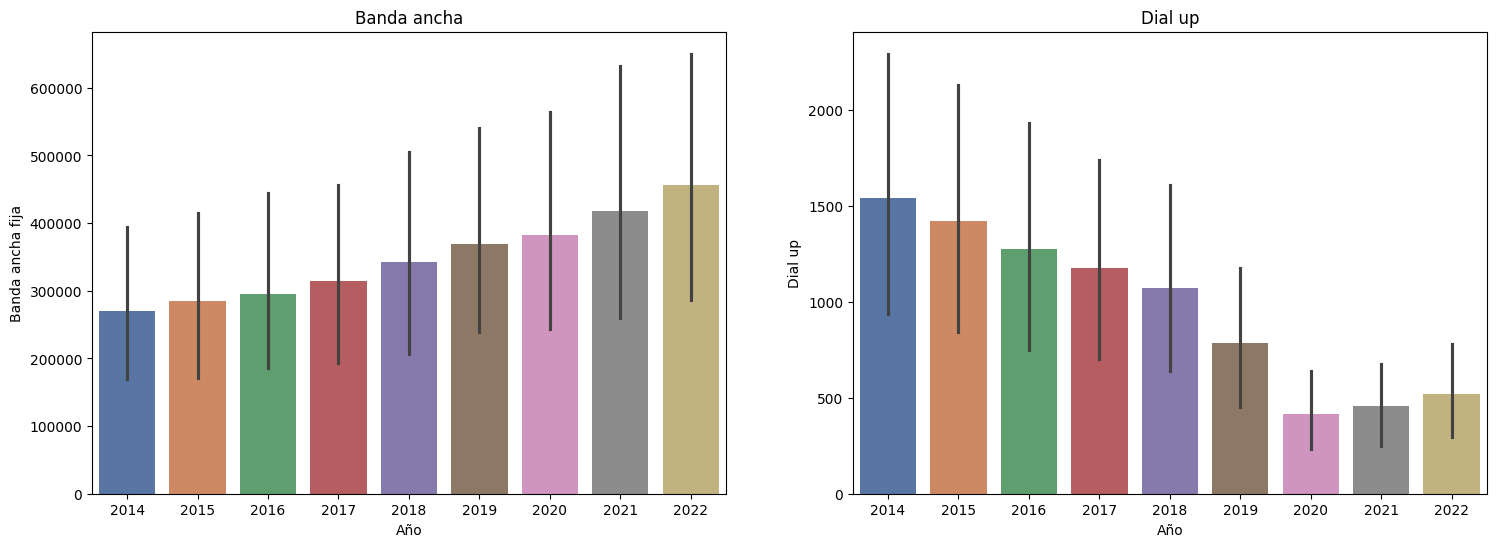

In [19]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.barplot(x='Año', y='Banda ancha fija', data = df, hue='Año', palette='deep', legend=False)
plt.title('Banda ancha')

plt.subplot(1,2,2)
sns.barplot(x='Año', y='Dial up', data = df, hue='Año', palette='deep', legend=False)
plt.title('Dial up')

plt.show()

Existe una disparidad notoria en la cantidad de usuarios entre la banda ancha y Dial-up, y esta brecha se debe principalmente a las marcadas diferencias en la velocidad de conexión entre estos dos tipos de servicios. La banda ancha representa una tecnología de conexión a Internet significativamente más rápida, confiable y estable en comparación con el Dial-up, a pesar de ser generalmente más costosa. Por otro lado, el Dial-up es una alternativa más económica, pero a expensas de velocidades de conexión considerablemente más lentas y una menor estabilidad en la conexión.

Es importante destacar que, a medida que transcurre el tiempo, se ha observado una disminución gradual en la utilización del servicio de conexión Dial-up, por lo antes mencionado. Pero del 2020 al 2022 vemos que hubo una pequeña subida que esta directamente relacionada con la pandemia.

### Analisis de outliers

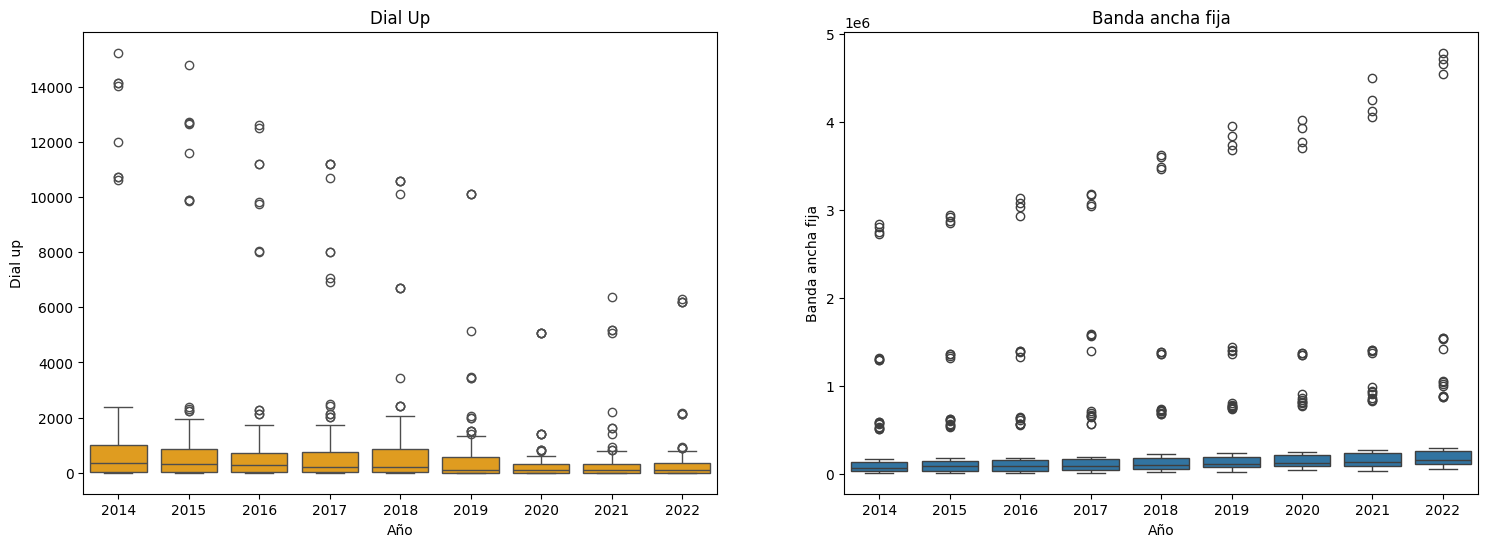

In [23]:
plt.figure(figsize=(18,6))
plt.subplot(1,2,1)
sns.boxplot(x='Año',y='Dial up', data = df, color='orange')
plt.title('Dial Up')
plt.subplot(1,2,2)
plt.title('Banda ancha fija')
sns.boxplot(x='Año',y='Banda ancha fija', data = df)
plt.show()

Se han identificado varios valores atípicos en la visión general de todas las provincias. Por lo tanto, llevaré a cabo un análisis más detallado de cada una de las provincias por separado:

Primero con dial up:

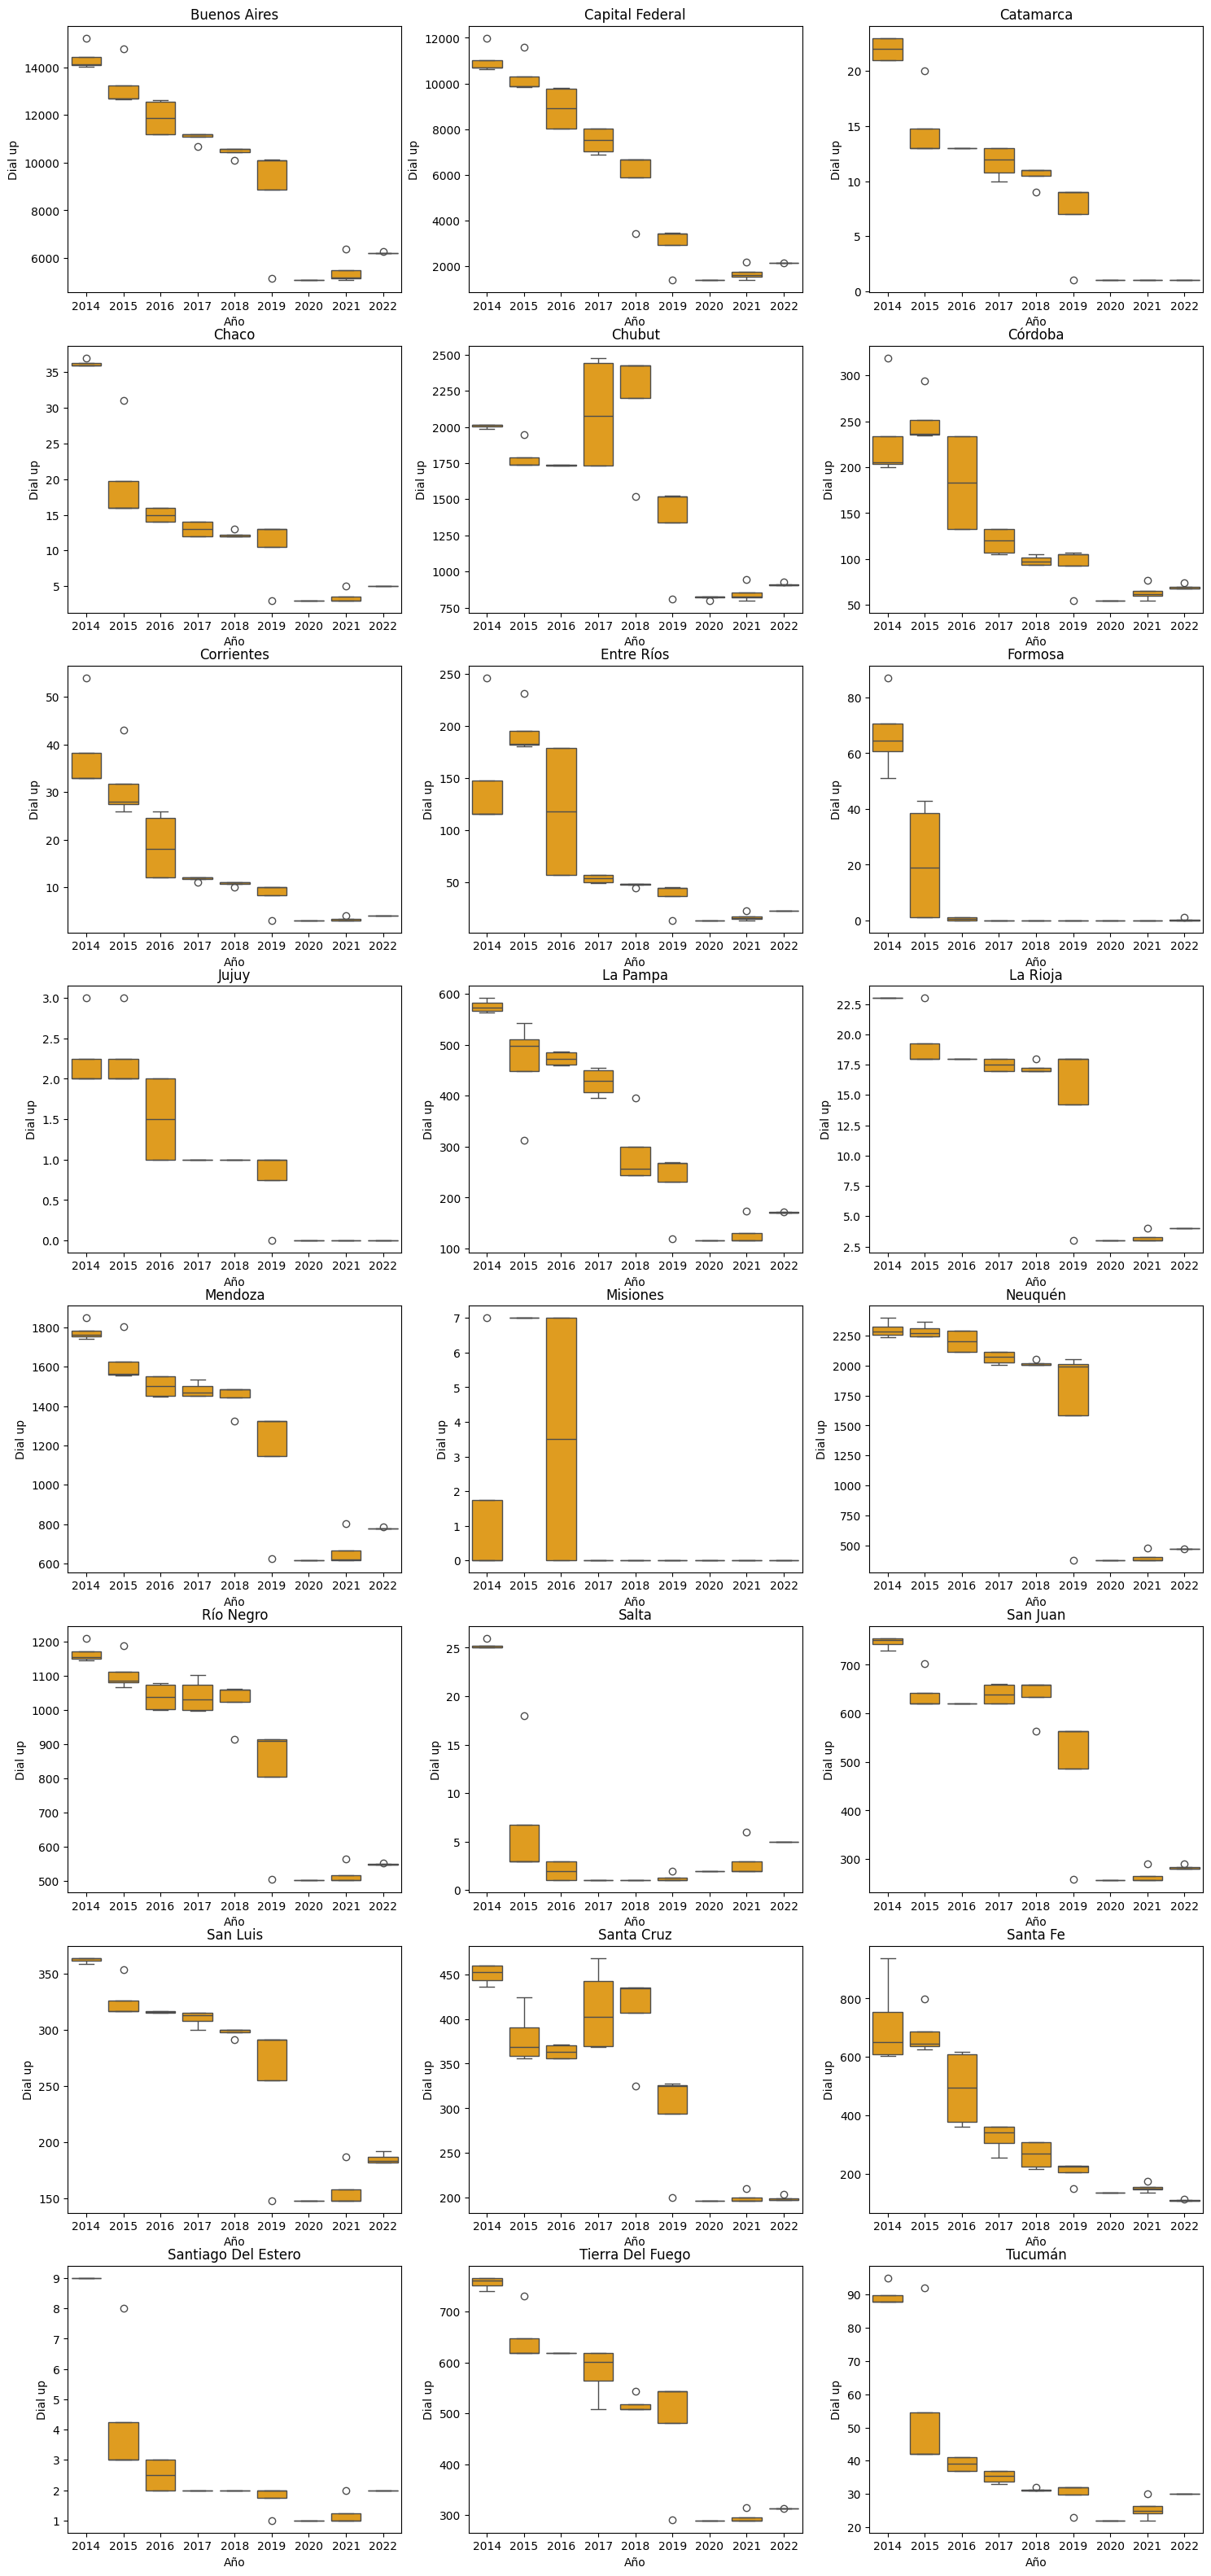

In [31]:
cantidad = 1
plt.figure(figsize=(18,40))
for provincia in df['Provincia'].unique().tolist():
    plt.subplot(8,3,cantidad)
    sns.boxplot(data = df[(df['Provincia'] == provincia)], x = 'Año', y='Dial up', color ='orange')
    plt.title(f'{provincia}')
    cantidad+=1
plt.show()

A continuacion con Banda ancha fija:

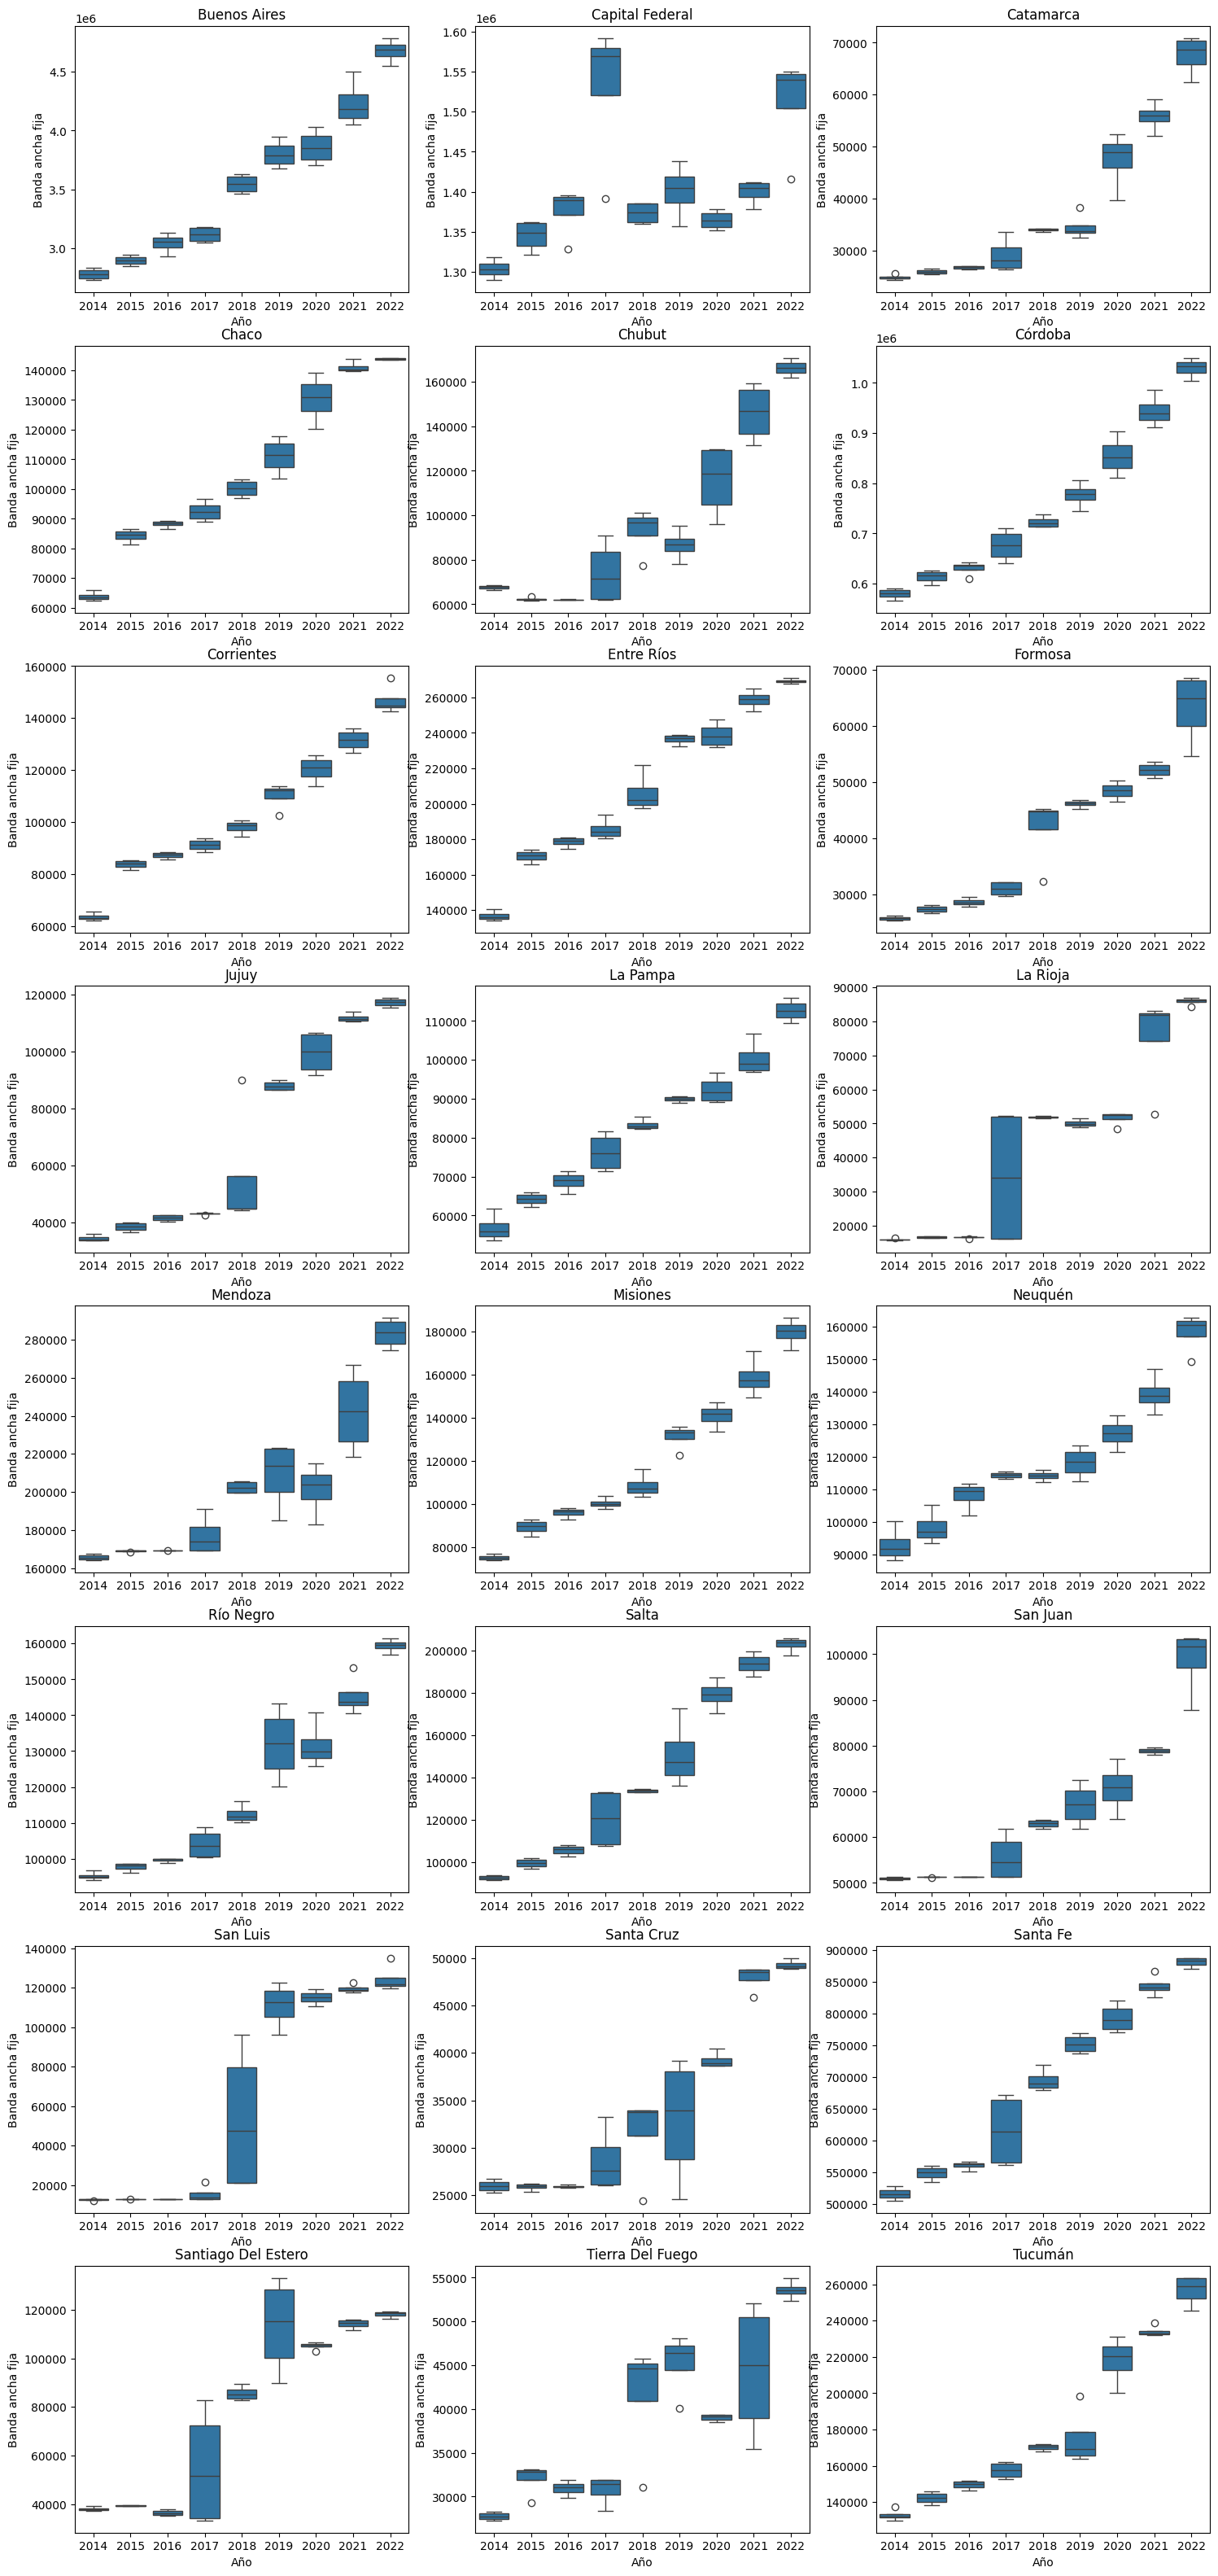

In [32]:
cantidad = 1
plt.figure(figsize=(18,40))
for provincia in df['Provincia'].unique().tolist():
    plt.subplot(8,3,cantidad)
    sns.boxplot(data = df[(df['Provincia'] == provincia)], x = 'Año', y='Banda ancha fija')
    plt.title(f'{provincia}')
    cantidad+=1
plt.show()

Al analizar ambos casos, se observa un patrón consistente, similar al que se ha encontrado en otros conjuntos de datos al identificar valores atípicos. Cuando se analizan todas las provincias a lo largo de los años, se evidencian varios valores atípicos. Sin embargo, al examinar cada provincia de forma individual, estos valores atípicos tienden a desaparecer. Esto es comprensible, dado que no todas las provincias cuentan con la misma infraestructura de conectividad y es probable que se hayan implementado políticas diferentes en cada una de ellas, lo que se refleja en las variaciones en las metricas. Estos hallazgos respaldan la idea de aplicar estrategias específicas a provincias con características similares, ya sea para aumentar o disminuir estas métricas.

### ETL para Power Bi

In [20]:
# Creamos una nueva columna para equiparar el valor del kpi
df['Mes proximo'] = None

provincias = df['Provincia'].unique().tolist()
# Los que tienen un valor en el proximo trimestre los guardamos como proximo
for provincia in provincias:
    lista = df.loc[df['Provincia'] == provincia, 'Dial up'].to_list()
    lista = lista[:-1]
    df.loc[(df['Provincia'] == provincia) & ((df['Año'] != 2022) | (df['Trimestre'] != 4)), 'Mes proximo'] = lista 

# Los que no tienen valor en el proximo mes osea los del 2022 Trim 4. ponemos el mismo valor que tiene.
for provincia in provincias:
    lista = df.loc[(df['Provincia'] == provincia) & ((df['Año'] == 2022) & (df['Trimestre'] == 4)), 'Dial up'].to_list()
    df.loc[(df['Provincia'] == provincia) & ((df['Año'] == 2022) & (df['Trimestre'] == 4)), 'Mes proximo'] = lista 

### Exportamos a csv para su uso en Power Bi

In [21]:
df.to_csv('Datasets trabajados/Internet_BAF.csv', sep=';', index=False)

## Dataset: Internet acceso por tecnologia

In [33]:
df = pd.read_excel('Datasets/3_Internet_Accesos-por-tecnologia.xlsx')
df

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
5,2021,3,1950631,5826257,1566048,492415,250190,10085541,Jul-Sept 2021
6,2021,2,2018587,5641731,1472246,476968,253552,9863084,Abr-Jun 2021
7,2021,1,2175211,5424782,1362976,434548,250455,9647972,Ene-Mar 2021
8,2020,4,2213949,5371824,1311199,421554,253036,9571562,Oct-Dic 2020
9,2020,3,2263889,5259351,1170879,413259,248821,9356199,Jul-Sept 2020


Este conjunto de datos proporciona información sobre el tipo de tecnologia para el acceso a Internet en Argentina durante 2014-2022 separados en trimestres. Los atributos en el conjunto de datos son los siguientes:

* Año: El año en que se recopilaron los datos.
* Trimestre: El trimestre específico dentro del año.
* ADSL: El número de conexiones de Internet por ADSL en ese período.
* Cablemodem: El número de conexiones de Internet por Cablemódem en ese período.
* Fibra óptica: El número de conexiones de Internet por Fibra óptica en ese período.
* Wireless: El número de conexiones de Internet inalámbricas en ese período.
* Otros: El número de conexiones de Internet de otros tipos en ese período.
* Total: El total de conexiones de Internet en ese período, que es la suma de todas las categorías mencionadas.
* Periodo: El rango de tiempo al que se refiere ese trimestre, como "Ene-Mar 2024" o "Jul-Sept 2022". Dato que no me parece importante para su analisis, porque no me brinda informacion extra.

### Analaisis del dataset

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           36 non-null     int64 
 1   Trimestre     36 non-null     int64 
 2   ADSL          36 non-null     int64 
 3   Cablemodem    36 non-null     int64 
 4   Fibra óptica  36 non-null     int64 
 5   Wireless      36 non-null     int64 
 6   Otros         36 non-null     int64 
 7   Total         36 non-null     int64 
 8   Periodo       36 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.7+ KB


##### Valores faltantes y repetidos

In [24]:
print(df.isna().sum())
print('-'*50)
print(df.value_counts()[df.value_counts() > 2])

Año             0
Trimestre       0
ADSL            0
Cablemodem      0
Fibra óptica    0
Wireless        0
Otros           0
Total           0
Periodo         0
dtype: int64
--------------------------------------------------
Series([], Name: count, dtype: int64)


Podemos observar que no tenemos ningun valor faltante ni repetido.

### Graficos

#### Acceso por tecnología a lo largo de los años

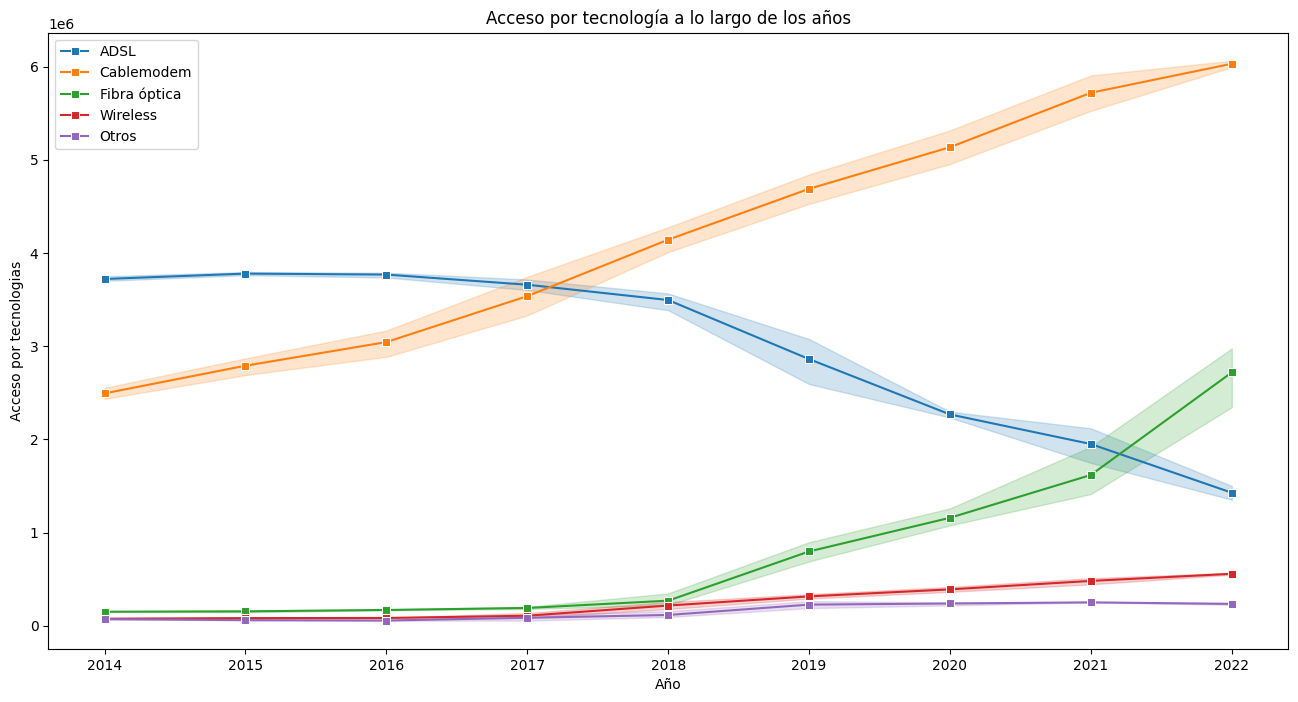

In [25]:
plt.figure(figsize=(16,8))
sns.lineplot(x='Año', y='ADSL', data = df, label = 'ADSL', marker = 's')
sns.lineplot(x='Año', y='Cablemodem', data = df, label = 'Cablemodem', marker = 's')
sns.lineplot(x='Año', y='Fibra óptica', data = df, label = 'Fibra óptica', marker = 's')
sns.lineplot(x='Año', y='Wireless', data = df, label = 'Wireless', marker = 's')
sns.lineplot(x='Año', y='Otros', data = df, label = 'Otros', marker = 's')
plt.ylabel('Acceso por tecnologias')
plt.title('Acceso por tecnología a lo largo de los años')
plt.show()


El ADSL, una tecnología de acceso a Internet a través de líneas telefónicas de cobre, fue pionera en proporcionar velocidades más rápidas que las conexiones de módem dial-up. Sin embargo, con el tiempo, tecnologías más avanzadas han ganado protagonismo. El cablemódem, que utiliza redes de televisión por cable, ha ofrecido velocidades de Internet más rápidas que el ADSL.

La última evolución en la transferencia de Internet es la fibra óptica, que utiliza cables de fibra óptica para transmitir datos a velocidades extremadamente altas y con una gran estabilidad. Esta tecnología ha revolucionado la conectividad a Internet.

El gráfico de lineas refleja cómo el ADSL muestra una disminución notable, en línea con la tendencia de disminución del Dial Up, mientras que la Banda Ancha y el Cablemódem están en aumento, lo que refleja la creciente demanda de velocidades más altas.

La introducción de la fibra óptica en Argentina ha acelerado la transición hacia tecnologías más avanzadas, especialmente en áreas urbanas. La inversión en infraestructura de fibra óptica indica su creciente importancia, ya que ofrece velocidades excepcionales y una experiencia de navegación sin interrupciones. La fibra óptica se perfila como el estándar del futuro, reemplazando progresivamente las tecnologías más antiguas. La competencia en el mercado de las telecomunicaciones ha impulsado estas mejoras en la conectividad a Internet, brindando a los usuarios opciones más rápidas y eficientes.

### Analisis de outliers

Text(0.5, 1.0, 'Fibra óptica')

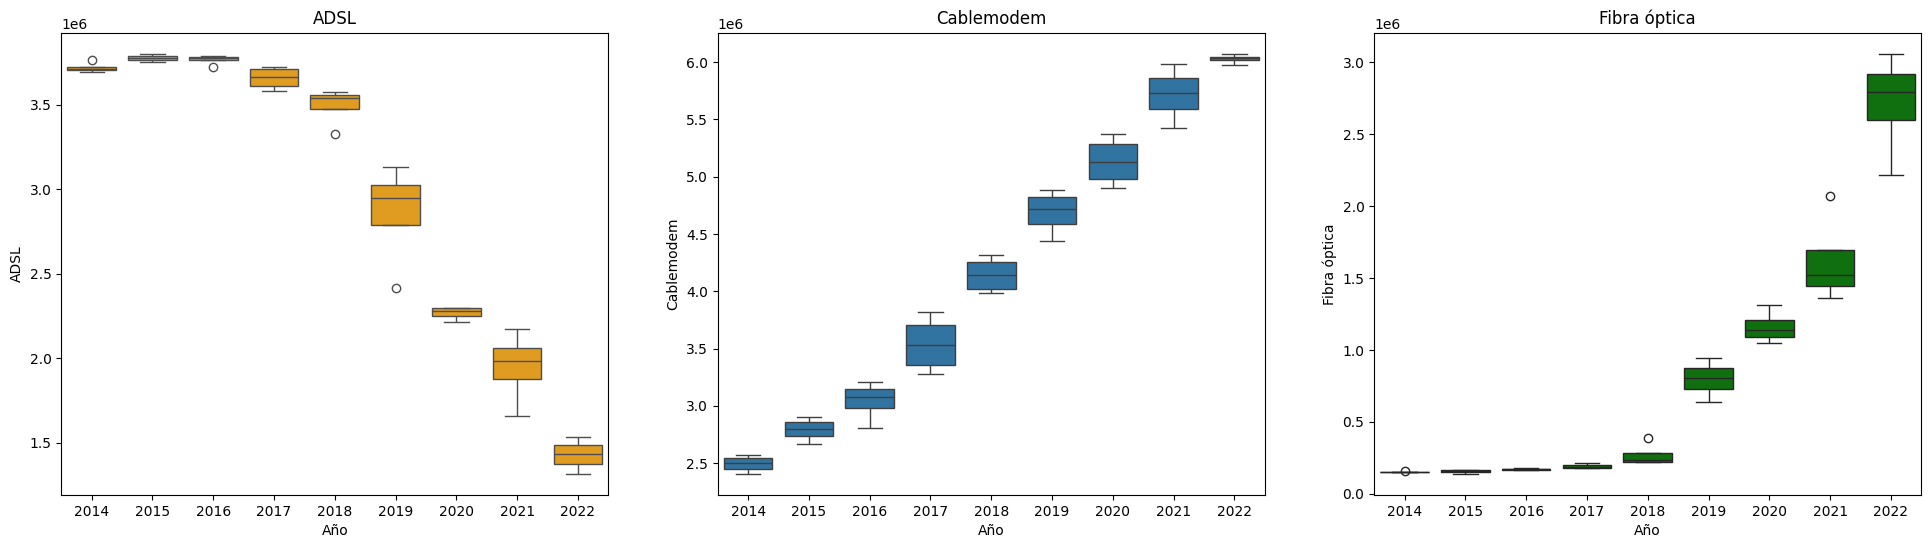

In [39]:
plt.figure(figsize=(24,6))
plt.subplot(1,3,1)
sns.boxplot(x='Año',y='ADSL', data = df, color='orange')
plt.title('ADSL')
plt.subplot(1,3,2)
sns.boxplot(x='Año',y='Cablemodem', data = df)
plt.title('Cablemodem')
plt.subplot(1,3,3)
sns.boxplot(x='Año',y='Fibra óptica', data = df, color='green')
plt.title('Fibra óptica')


No se observan valores atípicos que requieran un análisis individual por provincia, como se ha realizado en otros conjuntos de datos. Por lo tanto, no es necesario realizar un análisis a nivel provincial en este caso.

### ETL para Power Bi

In [26]:
# Creamos una nueva columna para equiparar el valor del KPI
df['Mes proximo'] = None

# Los que tienen un valor en el proximo trimestre los guardamos como proximo.
lista = df['Fibra óptica'].to_list()
lista = lista[:-1]
df.loc[(df['Año'] != 2022 ) | (df['Trimestre'] != 4), 'Mes proximo'] = lista

# Los que no tienen valor en el proximo mes osea los del 2022 Trim 4. ponemos el mismo valor que tiene.
df.loc[(df['Año'] == 2022) & (df['Trimestre'] == 4), 'Mes proximo'] = df['Fibra óptica'][0]

### Exportamos a csv para su uso en Power Bi

In [27]:
df.to_csv('Datasets trabajados/Accesos-por-tecnologia.csv', sep=';', index=False)

## Historico velocidad internet

In [73]:
df = pd.read_excel('Datasets/4_historico_velocidad_internet.xlsx')
df

,Año,Trimestre,Provincia,Mbps (Media de bajada)
0,2022,4,Buenos Aires,111.000000
1,2022,4,Capital Federal,182.860000
2,2022,4,Catamarca,83.330000
3,2022,4,Chaco,104.020000
4,2022,4,Chubut,15.920000
...,...,...,...,...
859,2014,1,Santa Cruz,3.315991
860,2014,1,Santa Fe,3.147407
861,2014,1,Santiago Del Estero,2.949472
862,2014,1,Tierra Del Fuego,3.446888


Este contiene información sobre la velocidad promedio de descarga de conexiones a Internet en diferentes provincias de Argentina a lo largo del 2014 al 2022 y sus respectivos trimestres. Cada columna tiene:

* Año: Esta columna indica el año en el que se recopiló la información sobre la velocidad de Internet. Va desde 2014 hasta 2022.
* Trimestre: Esta columna indica el trimestre del año al que se refiere la información. Cada año se divide en cuatro trimestres, por lo que hay un total de 4 trimestres por año.
* Provincia: En esta columna se detalla la provincia de Argentina a la que pertenecen los datos de velocidad de Internet.
* Mbps (Media de bajada): Esta columna contiene el valor de la velocidad promedio de descarga de Internet en la provincia y trimestre correspondiente. La velocidad se mide en megabits por segundo (Mbps).

### Analisis del dataset

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 864 entries, 0 to 863
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Año                     864 non-null    int64  
 1   Trimestre               864 non-null    int64  
 2   Provincia               864 non-null    object 
 3   Mbps (Media de bajada)  864 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 27.1+ KB


##### Valores faltantes y repetidos

In [75]:
print(df.isna().sum())
print('-'*50)
print(df.value_counts()[df.value_counts() > 2])

Año                       0
Trimestre                 0
Provincia                 0
Mbps (Media de bajada)    0
dtype: int64
--------------------------------------------------
Series([], Name: count, dtype: int64)


Vemos que no tenemos ningun valor faltante ni repetido.

### Graficos

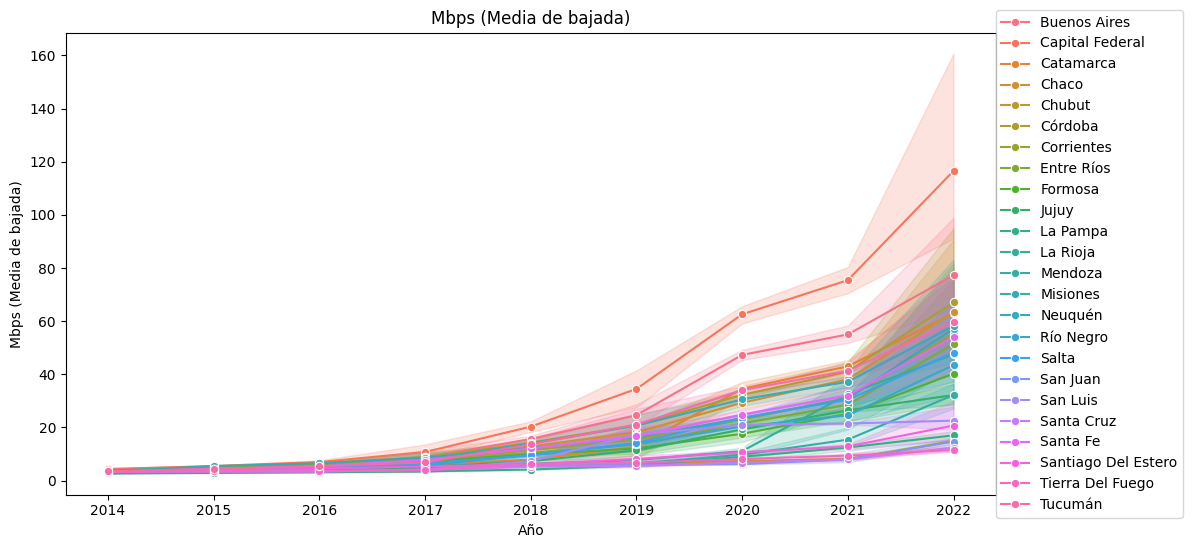

In [76]:
plt.figure(figsize=(12,6))
sns.lineplot(x='Año',y='Mbps (Media de bajada)', data = df, hue='Provincia', marker='o')
plt.legend(loc=(1,-0.05))
plt.title('Mbps (Media de bajada)')
plt.show()

Este gráfico de líneas proporciona una representación visual de la tendencia de la velocidad de Internet en Mbps en diversas provincias a lo largo del período comprendido entre 2014 y 2022.

Se observa una variación notoria en la velocidad de Internet en diferentes provincias a lo largo de este período.

A partir del año 2018, algunas provincias experimentaron un aumento significativo en sus velocidades de conexión, lo que puede indicar mejoras significativas en la infraestructura de Internet.

Por otro lado, algunas provincias muestran un crecimiento más lento en la velocidad de Internet durante este período.

Este análisis es esencial para comprender cómo ha evolucionado la conectividad en las provincias y puede proporcionar información valiosa para la toma de decisiones, la identificación de tendencias y la comparación entre áreas geográficas.

#### A continuacion vamos a ver el el promedio de las velocidades de internet de las provincias a lo largo de los años:

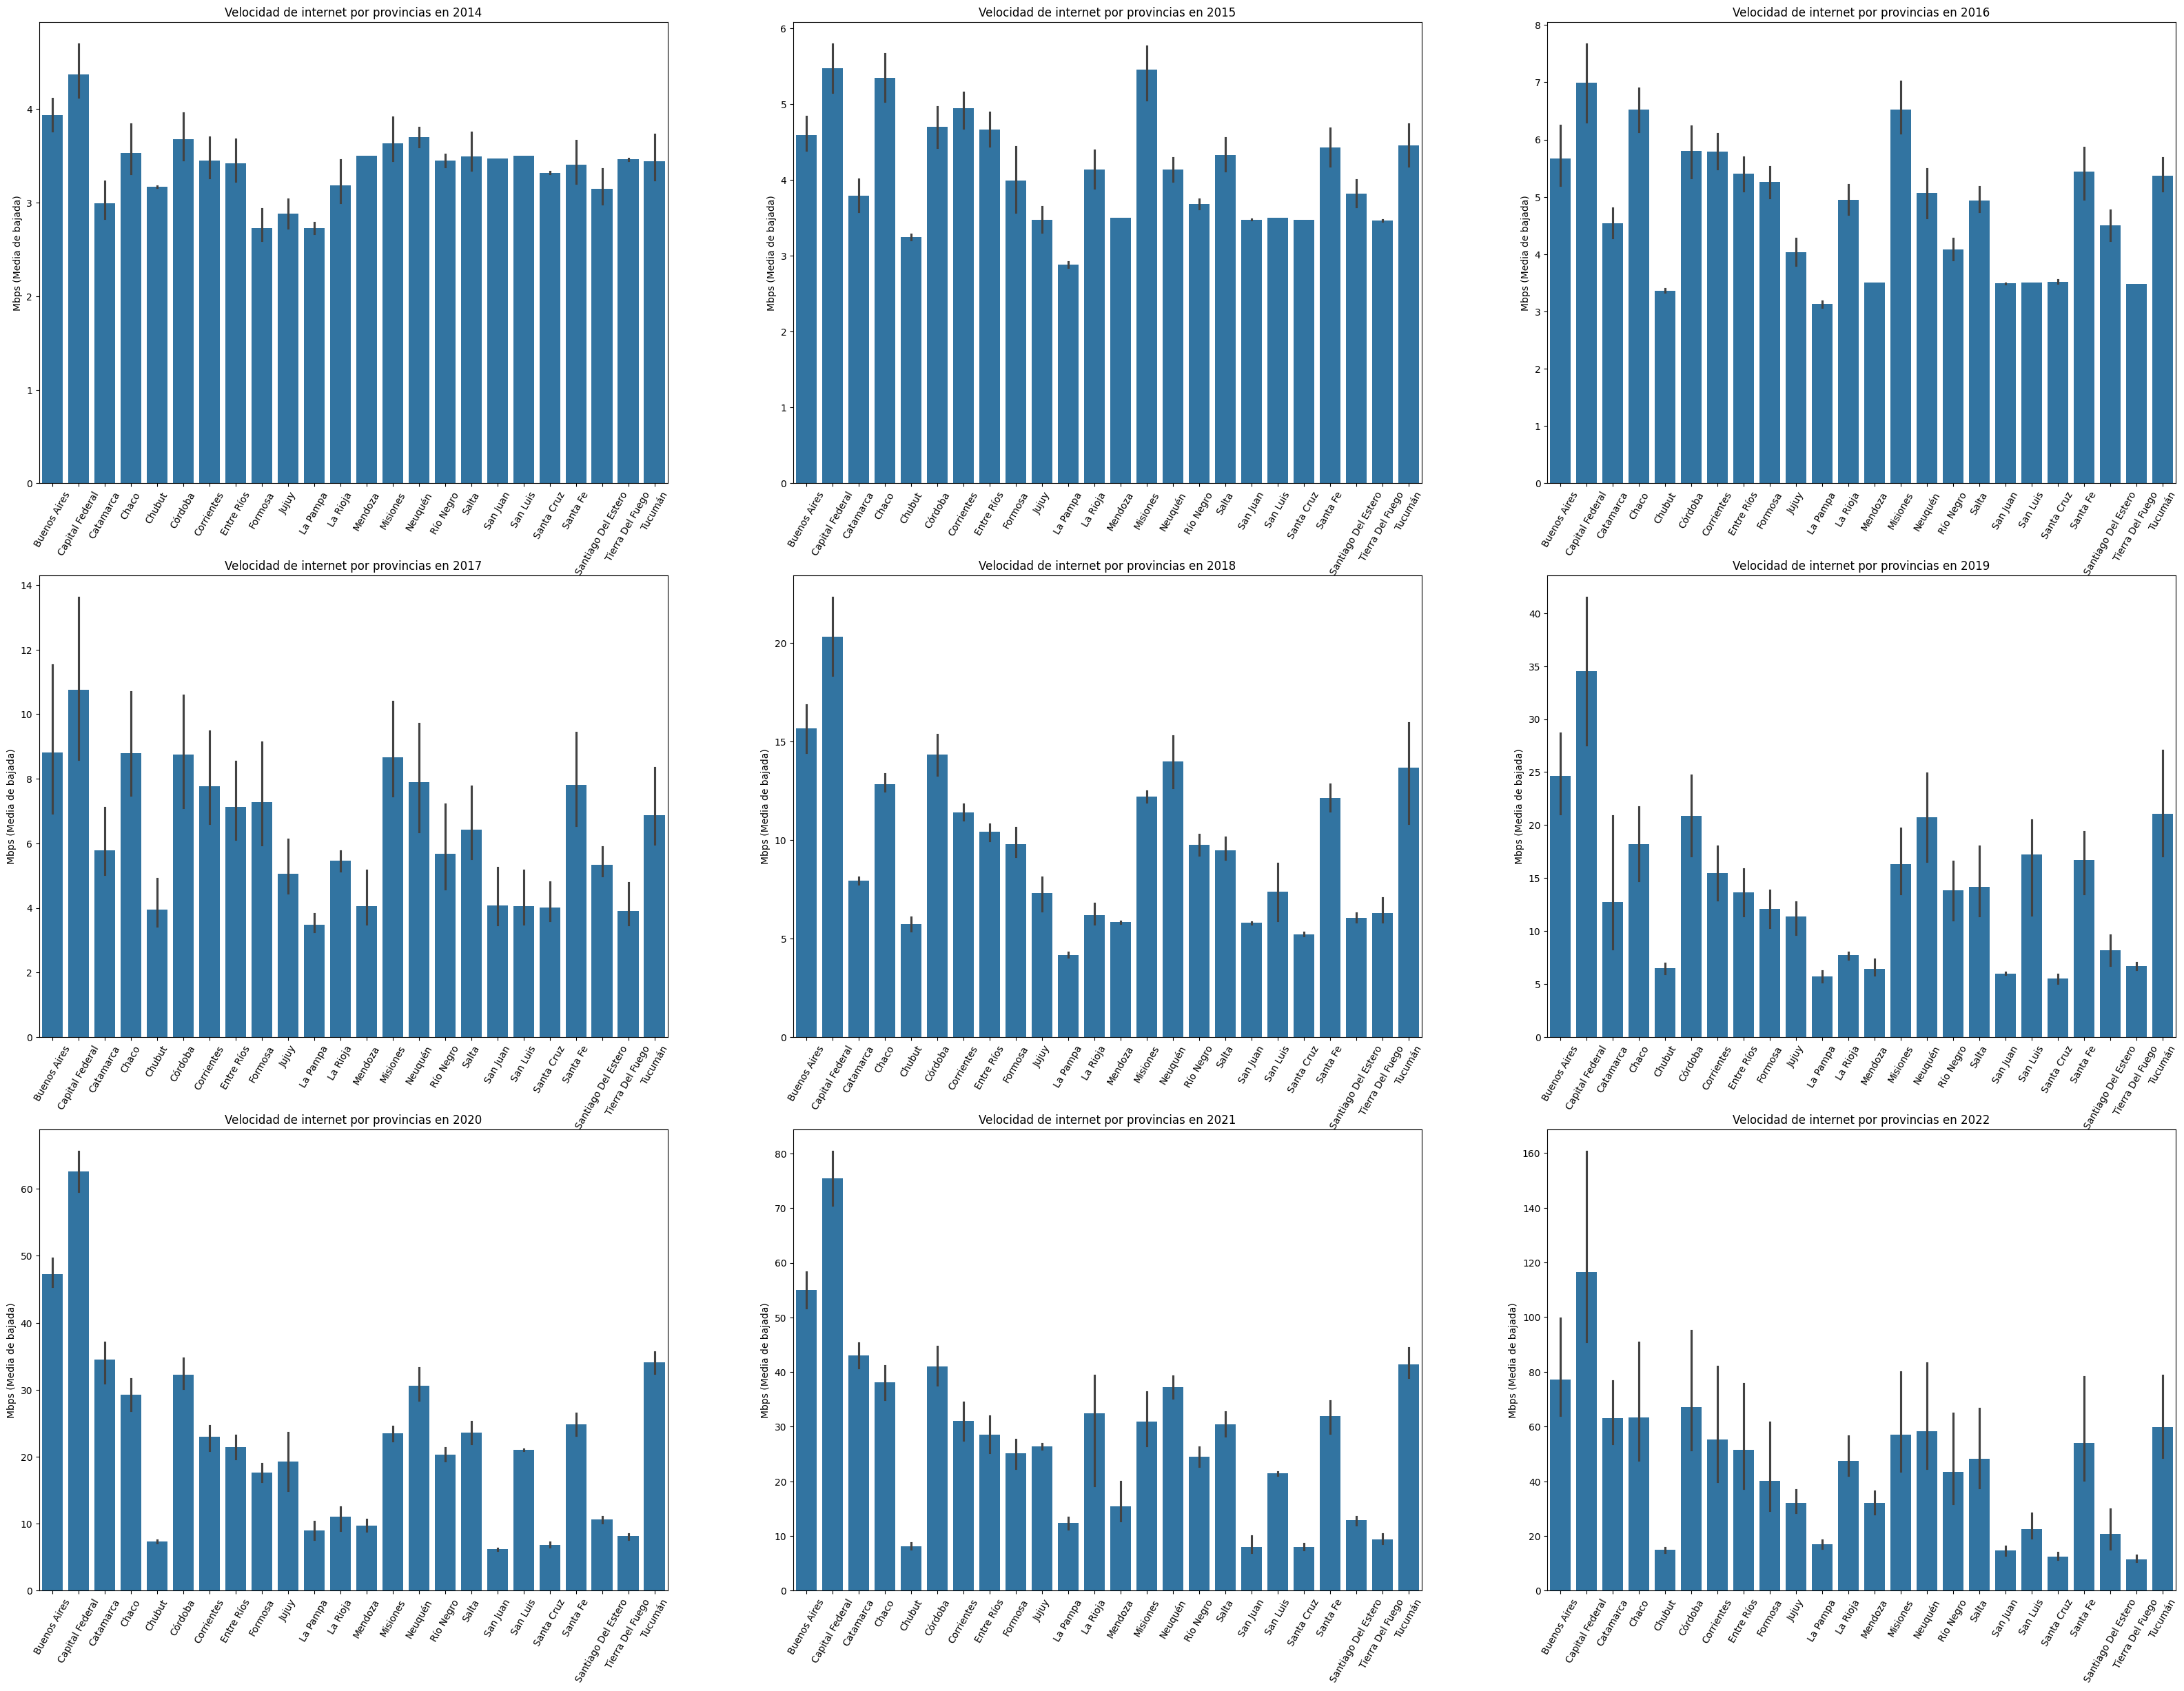

In [77]:
cantidad = 1
plt.figure(figsize=(40,40))
for año in sorted(df['Año'].unique().tolist()):
    plt.subplot(4,3,cantidad)
    sns.barplot(data = df[df['Año'] == año], y = 'Mbps (Media de bajada)', x = 'Provincia')
    plt.xticks(rotation=60)
    plt.title(f'Velocidad de internet por provincias en {año}')
    plt.xlabel('')
    cantidad += 1
plt.show()

En los gráficos, se evidencia claramente cómo la velocidad de descarga en megabits por segundo (Mbps) ha experimentado un aumento en la mayoría de las provincias a lo largo de los años. No obstante, también es notorio que algunas provincias, como Chubut, han mantenido una velocidad de Internet relativamente constante sin experimentar un crecimiento significativo en comparación con otras regiones. Esta información visual permite identificar las disparidades en la evolución de la velocidad de Internet entre las provincias.

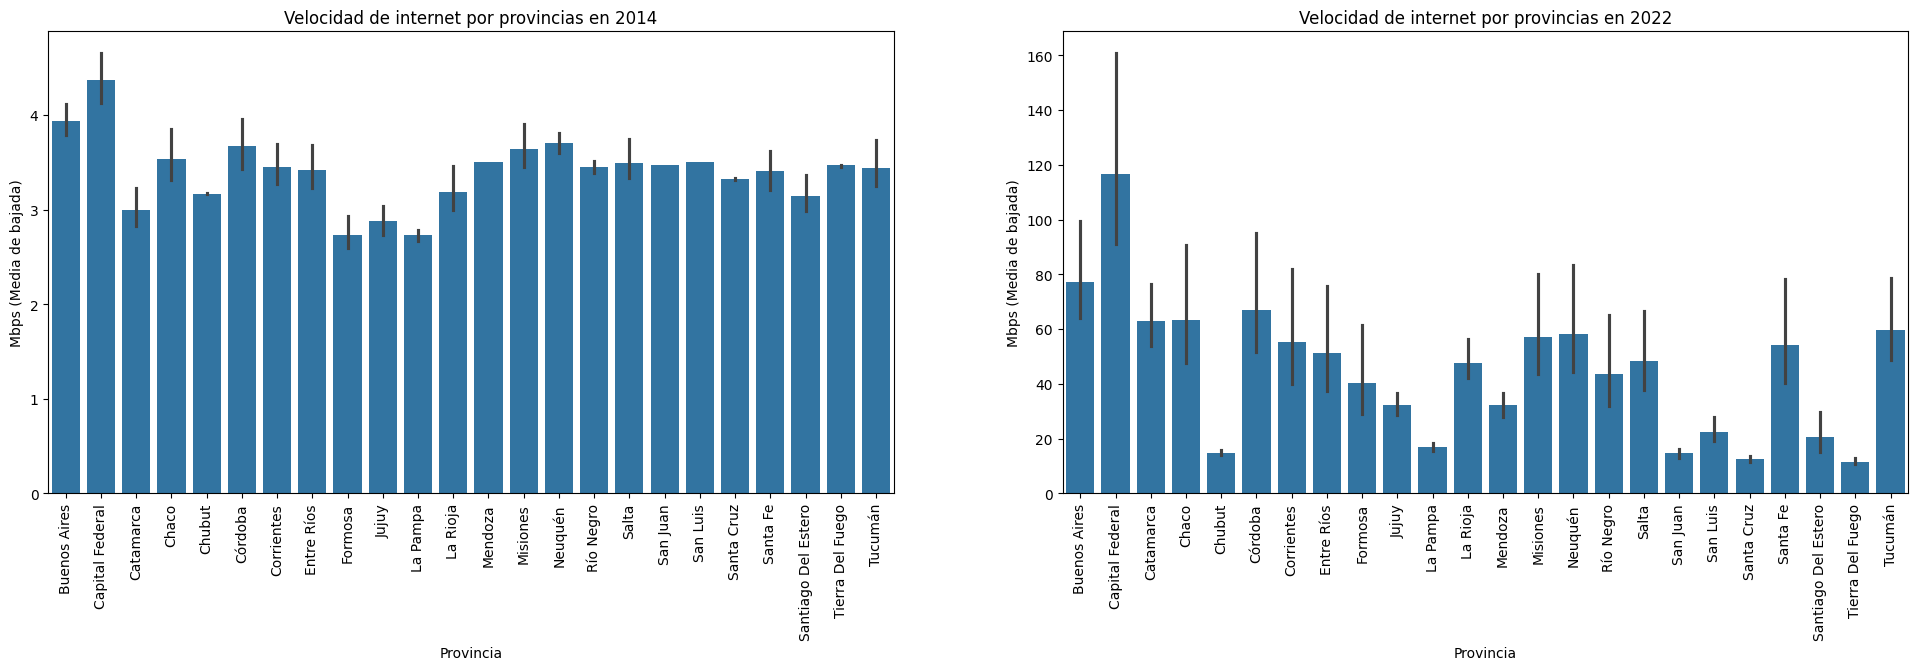

In [78]:
plt.figure(figsize=(24,6))
plt.subplot(1,2,1)
sns.barplot(data = df[df['Año'] == 2014], y = 'Mbps (Media de bajada)', x = 'Provincia')
plt.xticks(rotation=90)
plt.title('Velocidad de internet por provincias en 2014')

plt.subplot(1,2,2)
sns.barplot(data = df[df['Año'] == 2022], y = 'Mbps (Media de bajada)', x = 'Provincia')
plt.xticks(rotation=90)
plt.title('Velocidad de internet por provincias en 2022')

plt.show()

En el gráfico de barras de la izquierda, correspondiente al año 2014, podemos observar que las velocidades de conexión en todas las provincias se encuentran equilibradas, manteniéndose en un rango de entre 3 y 4 MB. Sin embargo, al analizar el gráfico de la derecha correspondiente al año 2022, notamos una marcada disparidad en las velocidades promedio de las provincias. En este caso, la Capital Federal destaca por tener la velocidad más alta entre todas las provincias, mientras que otras, como Chubut, San Juan, Santa Cruz y Tierra del Fuego, se mantienen en niveles de velocidad notoriamente más bajos.

Esta discrepancia en las métricas de velocidad de conexión en 2022 es un punto de análisis importante. Esta discrepacia podría ser por aspectos como infraestructura de telecomunicaciones, inversión en tecnología, densidad de población y acceso a servicios de banda ancha, entre otras.

Con esto podemos ver que la velocidad de internet es una metrica que de por si va aumentando por el tiempo, seguramente porque cada vez se utilizan mas dispositivos que requieren la conexion a internet.

Al dia de hoy hay pocas provincias que estan por debajo de los 20 MB, que seria una buena metrica a mejorar.

#### Provincias que estan por debajo de los 20 MB

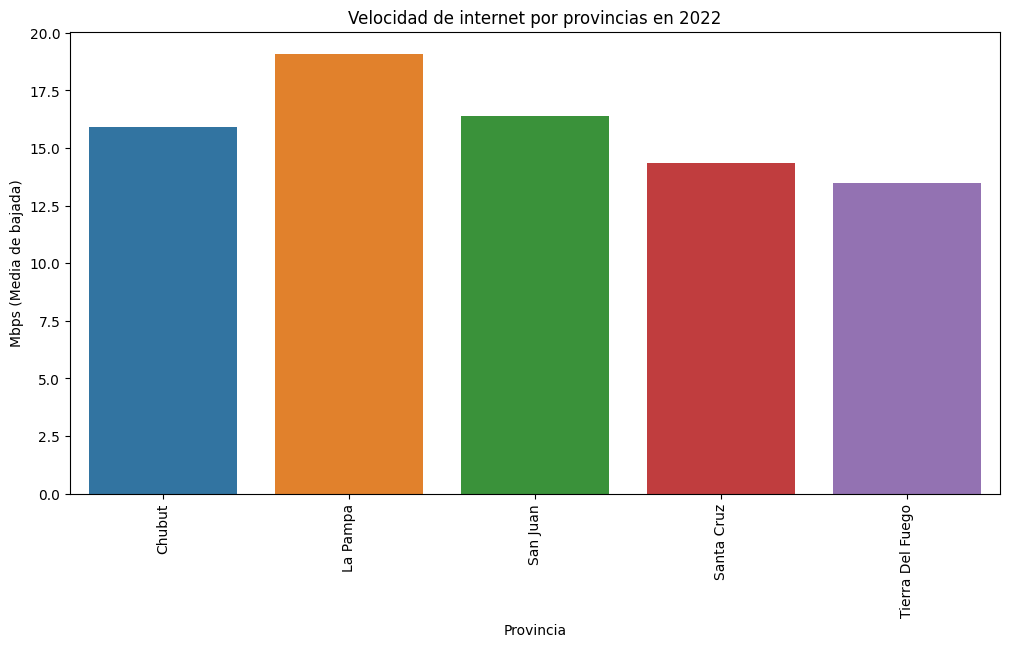

In [79]:
plt.figure(figsize=(12,6))
sns.barplot(data = df[(df['Año'] == 2022) & (df['Mbps (Media de bajada)'] < 20) & (df['Trimestre'] == 4)], y = 'Mbps (Media de bajada)', x = 'Provincia', hue='Provincia')
plt.xticks(rotation=90)
plt.title('Velocidad de internet por provincias en 2022')

plt.show()

En este grafico, podemos identificar las provincias que aún presentan velocidades de conexión promedio por debajo de 20 Mbps. Estas provincias merecen una atención especial en términos de mejora de infraestructura y acceso a servicios de Internet de alta velocidad. Es importante considerar estrategias y políticas para elevar la calidad de la conectividad en estas regiones, garantizando que los ciudadanos tengan acceso a una conexión a Internet más rápida y confiable.

### Analisis de outliers

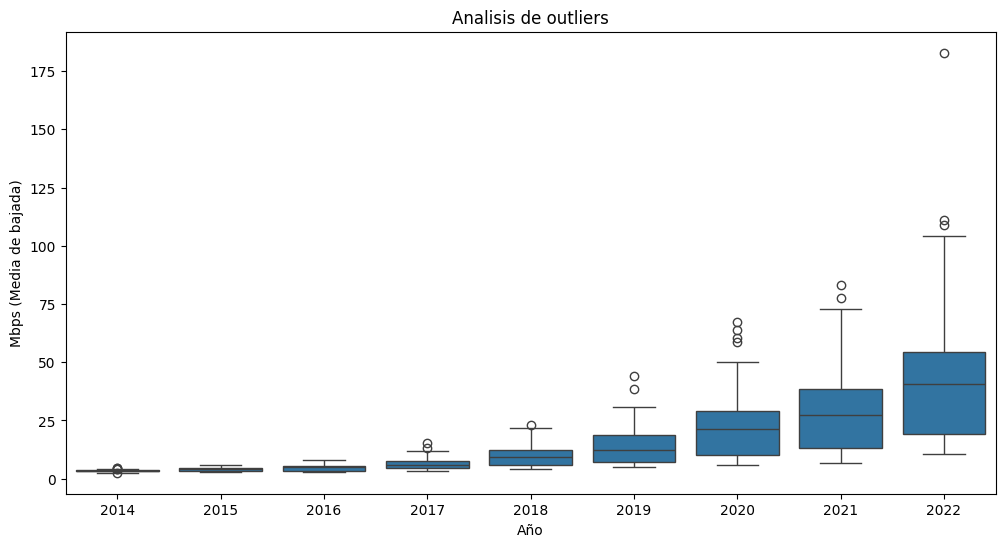

In [80]:
plt.figure(figsize=(12,6))
sns.boxplot(x='Año',y='Mbps (Media de bajada)', data = df,)
plt.title('Analisis de outliers')
plt.show()

Se pueden identificar valores atípicos que coinciden con el gráfico de líneas anterior, donde se observan diferencias significativas entre las provincias. En este caso, no considero necesario realizar un análisis detallado de cada uno de estos valores atípicos.

### Agregamos para el KPI

In [81]:
df['Trimestre proximo'] = None

provincias = df['Provincia'].unique().tolist()

for provincia in provincias:
    lista = df.loc[df['Provincia'] == provincia, 'Mbps (Media de bajada)'].to_list()
    lista = lista[:-1]
    df.loc[(df['Provincia'] == provincia) & ((df['Año'] != 2022) | (df['Trimestre'] != 4)), 'Trimestre proximo'] = lista 

for provincia in provincias:
    lista = df.loc[(df['Provincia'] == provincia) & ((df['Año'] == 2022) & (df['Trimestre'] == 4)), 'Mbps (Media de bajada)'].to_list()
    df.loc[(df['Provincia'] == provincia) & ((df['Año'] == 2022) & (df['Trimestre'] == 4)), 'Trimestre proximo'] = lista 

### Exportamos a csv para su uso en Power Bi

In [82]:
df.to_csv('Datasets trabajados/historico_velocidad.csv', sep=';', index=False)